In [8]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 544.7 kB/s eta 0:01:12
   ---------------------------------------- 0.1/38.8 MB 581.0 kB/s eta 0:01:07
   ---------------------------------------- 0.2/38.8 MB 980.4 kB/s eta 0:00:40
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.0 MB/s eta 0:00:38
    ---------------------

In [12]:
-import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2

def plot_gallery(images, titles, h, w, n_rows=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

# Corrected path
dir_name = r"D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Check if the main directory exists
if not os.path.isdir(dir_name):
    print(f"The directory {dir_name} does not exist. Please check the path.")
else:
    for person_name in os.listdir(dir_name):
        dir_path = os.path.join(dir_name, person_name)
        if not os.path.isdir(dir_path):
            print(f"Skipping {dir_path} because it is not a directory")
            continue  # Skip if not a directory
        class_names.append(person_name)
        for image_name in os.listdir(dir_path):
            # Formulate the image path
            image_path = os.path.join(dir_path, image_name)
            # Check if the file is an image
            if not (image_path.lower().endswith('.png') or image_path.lower().endswith('.jpg') or image_path.lower().endswith('.jpeg')):
                print(f"Skipping {image_path} because it is not an image")
                continue  # Skip non-image files
            # Print the image path for debugging
            print(f"Processing image: {image_path}")
            # Read the input image
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: Unable to load image {image_path}")
                continue  # Skip this image if it cannot be loaded
            # Convert into grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Resize image to 300x300 dimension
            resized_image = cv2.resize(gray, (h, w))
            # Convert matrix to vector
            v = resized_image.flatten()
            X.append(v)
            # Increase the number of samples
            n_samples = n_samples + 1
            # Adding the categorial label
            y.append(person_id)
            # Adding the person name
            target_names.append(person_name)
        # Increase the person id by 1
        person_id = person_id + 1

    # Check if any images were processed
    if n_samples == 0:
        print("No images were processed. Please check your dataset and paths.")
    else:
        # Transform list to numpy array
        y = np.array(y)
        X = np.array(X)
        target_names = np.array(target_names)
        n_features = X.shape[1]
        print(y.shape, X.shape, target_names.shape)
        print("Number of Samples: ", n_samples)

        # Total dataset size
        n_classes = target_names.shape[0]
        print("Total dataset size: ")
        print("n_samples: %d" % n_samples)
        print("n_features: %d" % n_features)
        print("n_classes: %d" % n_classes)


Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_101.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_102.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_106.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_107.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_114.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_115.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_117.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_118.jpg


Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_101.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_102.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_106.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_107.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_114.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_115.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_117.jpg
Processing image: D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces\Aamir\face_118.jpg


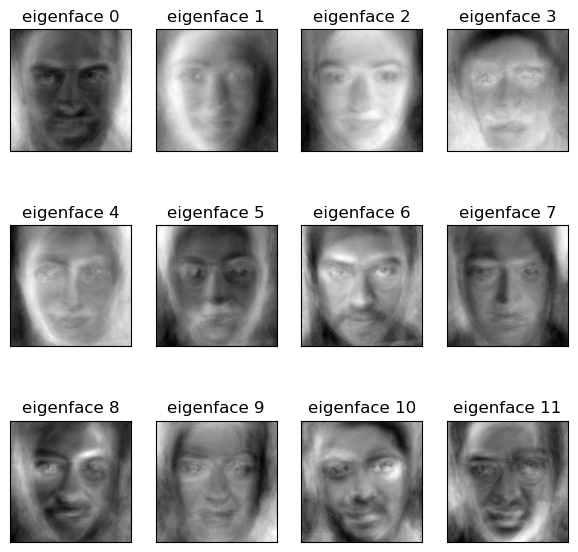

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

# Corrected path
dir_name = r"D:\Internship_Studio\from_GITHUB\introduction_to_machine_learning\dataset\dataset\faces"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Check if the main directory exists
if not os.path.isdir(dir_name):
    print(f"The directory {dir_name} does not exist. Please check the path.")
else:
    for person_name in os.listdir(dir_name):
        dir_path = os.path.join(dir_name, person_name)
        if not os.path.isdir(dir_path):
            print(f"Skipping {dir_path} because it is not a directory")
            continue  # Skip if not a directory
        class_names.append(person_name)
        for image_name in os.listdir(dir_path):
            # Formulate the image path
            image_path = os.path.join(dir_path, image_name)
            # Check if the file is an image
            if not (image_path.lower().endswith('.png') or image_path.lower().endswith('.jpg') or image_path.lower().endswith('.jpeg')):
                print(f"Skipping {image_path} because it is not an image")
                continue  # Skip non-image files
            # Print the image path for debugging
            print(f"Processing image: {image_path}")
            # Read the input image
            img = cv2.imread(image_path)
            if img is None:
                print(f"Warning: Unable to load image {image_path}")
                continue  # Skip this image if it cannot be loaded
            # Convert into grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Resize image to 300x300 dimension
            resized_image = cv2.resize(gray, (h, w))
            # Convert matrix to vector
            v = resized_image.flatten()
            X.append(v)
            # Increase the number of samples
            n_samples = n_samples + 1
            # Adding the categorial label
            y.append(person_id)
            # Adding the person name
            target_names.append(person_name)
        # Increase the person id by 1
        person_id = person_id + 1

    # Check if any images were processed
    if n_samples == 0:
        print("No images were processed. Please check your dataset and paths.")
    else:
        # Transform list to numpy array
        y = np.array(y)
        X = np.array(X)
        target_names = np.array(target_names)
        n_features = X.shape[1]
        print(y.shape, X.shape, target_names.shape)
        print("Number of Samples: ", n_samples)

        # Total dataset size
        n_classes = target_names.shape[0]
        print("Total dataset size: ")
        print("n_samples: %d" % n_samples)
        print("n_features: %d" % n_features)
        print("n_classes: %d" % n_classes)

        # Split into a training set and a test set using stratified K fold
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=42, stratify=y)

        # Compute PCA (eigenfaces)
        n_components = 150
        print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

        pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

        eigenfaces = pca.components_.reshape((n_components, h, w))

        def plot_gallery(images, titles, h, w, n_rows=3, n_cols=4):
            """Helper function to plot a gallery of portraits"""
            plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))
            for i in range(n_rows * n_cols):
                plt.subplot(n_rows, n_cols, i + 1)
                plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
                plt.title(titles[i], size=12)
                plt.xticks(())
                plt.yticks(())

        eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
        plot_gallery(eigenfaces, eigenface_titles, h, w)

        plt.show()

        print("Projecting the input data on the eigenfaces orthonormal basis")
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        print(X_train_pca.shape, X_test_pca.shape)

        # Compute Fisherfaces using LDA
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_pca, y_train)

        X_train_lda = lda.transform(X_train_pca)
        X_test_lda = lda.transform(X_test_pca)
        print("Project done...")


Extracting the top 150 eigenfaces from 337 faces


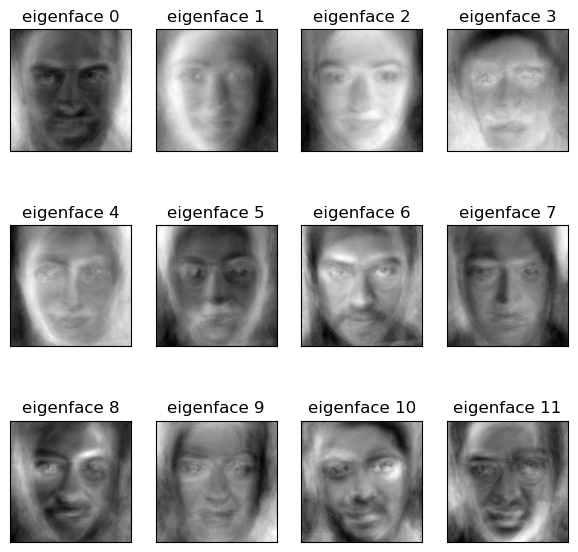

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [34]:
# Split into a training set and a test set using stratified K fold
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Compute PCA (eigenfaces)
n_components = 150
print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

def plot_gallery(images, titles, h, w, n_rows=3, n_cols=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_cols, 2.4 * n_rows))
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# Compute Fisherfaces using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")


In [35]:
# Training with Multi layer perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10),max_iter=1000, verbose=True).fit(X_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.11433740
Iteration 2, loss = 3.05340859
Iteration 3, loss = 2.99534971
Iteration 4, loss = 2.94314231
Iteration 5, loss = 2.88792294
Iteration 6, loss = 2.83556229
Iteration 7, loss = 2.78424791
Iteration 8, loss = 2.73351788
Iteration 9, loss = 2.68529300
Iteration 10, loss = 2.63774759
Iteration 11, loss = 2.59300371
Iteration 12, loss = 2.54950603
Iteration 13, loss = 2.50913423
Iteration 14, loss = 2.46878572
Iteration 15, loss = 2.43059974
Iteration 16, loss = 2.39401572
Iteration 17, loss = 2.35776947
Iteration 18, loss = 2.32257517
Iteration 19, loss = 2.28694838
Iteration 20, loss = 2.25239834
Iteration 21, loss = 2.21784519
Iteration 22, loss = 2.18543511
Iteration 23, loss = 2.15153868
Iteration 24, loss = 2.11974151
Iteration 25, loss = 2.08632524
Iteration 26, loss = 2.05412319
Iteration 27, loss = 2.02354703
Iteration 28, loss = 1.99172367
Iteration 29, loss = 1.96151083
Iteration 30, loss = 1.93007324
Iteration 31, loss = 1.90072394
Iteration 32, los

Accuracy: 74.33628318584071


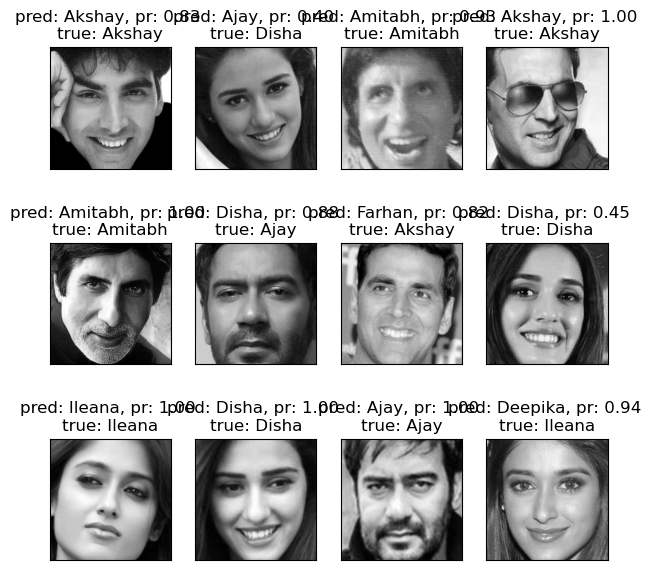

In [36]:
from sklearn.metrics import accuracy_score

# Predict class probabilities and labels for test set
y_pred = []
y_prob = []

for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform predictions to numpy array
y_pred = np.array(y_pred)

# Generate prediction titles and calculate true positives
prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %.2f \ntrue: %s' % (pred_name, y_prob[i], true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive += 1

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# Plot results
plot_gallery(X_test.reshape(-1, h, w), prediction_titles, h, w)
plt.show()


Evaluating k=10


D:\navanatak\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for k=10: 45.13%
Evaluating k=20


D:\navanatak\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for k=20: 60.18%
Evaluating k=50


D:\navanatak\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for k=50: 70.80%
Evaluating k=100
Accuracy for k=100: 74.34%
Evaluating k=150
Accuracy for k=150: 70.80%
Evaluating k=200
Accuracy for k=200: 68.14%
Evaluating k=300
Accuracy for k=300: 46.90%


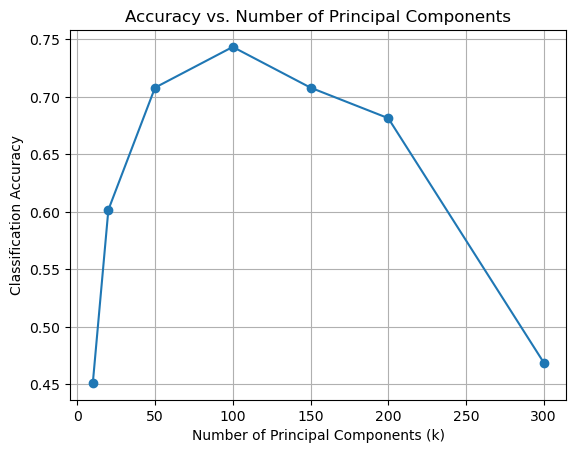

In [37]:
# Evaluate different values of k in PCA
k_values = [10, 20, 50, 100, 150, 200, 300]
accuracies = []

for k in k_values:
    print(f"Evaluating k={k}")
    
    # Compute PCA (eigenfaces)
    pca = PCA(n_components=k, svd_solver='randomized', whiten=True).fit(X_train)
    
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Compute Fisherfaces using LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, y_train)
    
    X_train_lda = lda.transform(X_train_pca)
    X_test_lda = lda.transform(X_test_pca)
    
    # Train MLP classifier
    clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000)
    clf.fit(X_train_lda, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test_lda)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")

# Plot accuracy vs. k
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs. Number of Principal Components')
plt.grid(True)
plt.show()